# Assignment 3
The objective of this assignment is to get you familiarize with `AutoEncoders`.

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Note
- Code snippets are in ``Pytorch``. If you are comfortable with ``Keras`` feel free to use it. No restrictions on the frameworks

## Datasets 
- CIFAR10

## Packages Used
- Pytorch 
- Refer this link to get familiarity with pytorch and CIFAR10 dataset[link](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment3_Q2.ipynb`.

## Question 2 : Autoencoders


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

### Load CIFAR 10 Dataset

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("Train Data shape:", trainset.data.shape)
print("Test Data shape:", testset.data.shape)

Files already downloaded and verified
Files already downloaded and verified
Train Data shape: (50000, 32, 32, 3)
Test Data shape: (10000, 32, 32, 3)


### Visualize the Data

torch.Size([16, 3, 32, 32])
torch.Size([16])


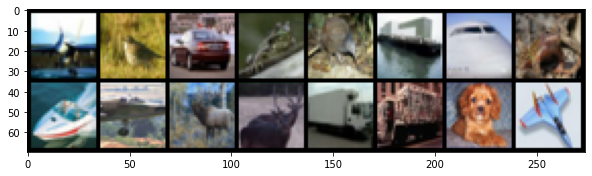

In [3]:
def imshow(img):
    img = img #/ 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))

### Define Model
Refer ``` torch.nn ``` [link](https://pytorch.org/docs/stable/nn.html) 

Experiment with different architectures of encoder and decoder i.e
- encoder and decoder is fully connected layers
- encoder and decoder is combination of convolution layers + fully connected layers
- encoder and decoder is fully convolutional layers.

In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [5]:
class AutoencoderConvF(nn.Module):
    def __init__(self):
        super(AutoencoderConvF, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Conv2d(3, 12, 4, stride=2, padding=1),            # [batch, 12, 16, 16]
            nn.ReLU(),
            nn.Conv2d(12, 24, 4, stride=2, padding=1),           # [batch, 24, 8, 8]
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(1536,512),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.Linear(512,1536),
            nn.ReLU(),
            nn.Unflatten(1,(24,8 ,8)),
            nn.ConvTranspose2d(24, 12, 4, stride=2, padding=1),  # [batch, 12, 16, 16]
            nn.ReLU(),
            nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),   # [batch, 3, 32, 32]
            nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [6]:
class AutoencoderLinear(nn.Module):
    def __init__(self):
        super(AutoencoderLinear, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here

            nn.Flatten(),   #[batch_size*3*32*32]
            nn.Linear(3072,1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),

        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.Linear(256,512),
            nn.ReLU(),
            nn.Linear(512,1024),
            nn.ReLU(),
            nn.Linear(1024,3072),
            nn.ReLU(),
            nn.Unflatten(1,(3,32 ,32)),
            nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [7]:
class AutoencoderConv(nn.Module):
    def __init__(self):
        super(AutoencoderConv, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Conv2d(3, 12, 4, stride=2, padding=1),            # [batch, 12, 16, 16]
            nn.ReLU(),
            nn.Conv2d(12, 24, 4, stride=2, padding=1),           # [batch, 24, 8, 8]
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.ConvTranspose2d(24, 12, 4, stride=2, padding=1),  # [batch, 12, 16, 16]
            nn.ReLU(),
            nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),   # [batch, 3, 32, 32]
            nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [8]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoderConvF = AutoencoderConvF()
  autoencoderLinear = AutoencoderLinear()
  autoencoderConv = AutoencoderConv()
  #print_model(autoencoderConvF.encoder, autoencoderConvF.decoder)
  return autoencoderConvF,autoencoderLinear,autoencoderConv

### Loss and Optimizer

In [9]:
autoencoderConvF,autoencoderLinear,autoencoderConv = create_model()

print("Convlutional with Linear layers")
print_model(autoencoderConvF.encoder, autoencoderConvF.decoder)
print("Only Linear layers Models")
print_model(autoencoderLinear.encoder, autoencoderLinear.decoder)
print("Only Convolutional layers Model")
print_model(autoencoderConv.encoder, autoencoderConv.decoder)

criterion = nn.MSELoss()
optimizerConvF = optim.Adam(autoencoderConvF.parameters())
optimizerLinear = optim.Adam(autoencoderLinear.parameters())
optimizerConv = optim.Adam(autoencoderConv.parameters())

Convlutional with Linear layers
############## Encoder ##############
Sequential(
  (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(12, 24, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (3): ReLU()
  (4): Flatten(start_dim=1, end_dim=-1)
  (5): Linear(in_features=1536, out_features=512, bias=True)
  (6): ReLU()
)
############## Decoder ##############
Sequential(
  (0): Linear(in_features=512, out_features=1536, bias=True)
  (1): ReLU()
  (2): Unflatten(dim=1, unflattened_size=(24, 8, 8))
  (3): ConvTranspose2d(24, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (4): ReLU()
  (5): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (6): Sigmoid()
)

Only Linear layers Models
############## Encoder ##############
Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=1024, bias=True)
  (2): ReLU()
  (3): Linear(in_features=1024, out_features=512, bias=True)


### Training

**Training of Combination of convolution layers + fully connected layers**

In [11]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs)
	
			# ============ Forward ============
			encoded, outputs = autoencoderConvF(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			autoencoderConvF.zero_grad()
			loss.backward()
			optimizerConvF.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training convolutional and linear layers')
print('Saving Model...')
torch.save(autoencoderConvF.state_dict(), "autoencoderConvF.pt")

[1,  2000] loss: 0.017
[2,  2000] loss: 0.008
[3,  2000] loss: 0.006
[4,  2000] loss: 0.005
[5,  2000] loss: 0.005
[6,  2000] loss: 0.004
[7,  2000] loss: 0.004
[8,  2000] loss: 0.004
[9,  2000] loss: 0.004
[10,  2000] loss: 0.004
Finished Training convolutional and linear layers
Saving Model...


**Training of fully convolutional layers.**

In [12]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs)
	
			# ============ Forward ============
			encoded, outputs = autoencoderConv(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			autoencoderConv.zero_grad()
			loss.backward()
			optimizerConv.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training of convolutional only model')
print('Saving Model...')
torch.save(autoencoderConv.state_dict(), "autoencoderConv.pt")

[1,  2000] loss: 0.008
[2,  2000] loss: 0.003
[3,  2000] loss: 0.002
[4,  2000] loss: 0.001
[5,  2000] loss: 0.001
[6,  2000] loss: 0.001
[7,  2000] loss: 0.001
[8,  2000] loss: 0.001
[9,  2000] loss: 0.001
[10,  2000] loss: 0.001
Finished Training of convolutional only model
Saving Model...


**Training of Fully connected layers**

In [13]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs)
	
			# ============ Forward ============
			encoded, outputs = autoencoderLinear(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			autoencoderLinear.zero_grad()
			loss.backward()
			optimizerLinear.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
	
print('Finished Training of the Linear only model')
print('Saving Model...')
torch.save(autoencoderLinear.state_dict(), "autoencoderLinear.pt")

[1,  2000] loss: 0.059
[2,  2000] loss: 0.055
[3,  2000] loss: 0.053
[4,  2000] loss: 0.052
[5,  2000] loss: 0.052
[6,  2000] loss: 0.051
[7,  2000] loss: 0.051
[8,  2000] loss: 0.050
[9,  2000] loss: 0.050
[10,  2000] loss: 0.050
Finished Training of the Linear only model
Saving Model...


### Load the saved model and Reconstruct the image

In [14]:
autoencoderConvF.load_state_dict(torch.load("/content/autoencoderConvF.pt"))
autoencoderLinear.load_state_dict(torch.load("/content/autoencoderLinear.pt"))
autoencoderConv.load_state_dict(torch.load("/content/autoencoderConv.pt"))

<All keys matched successfully>

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


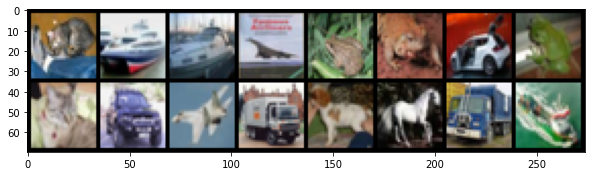

Reconstructed image from convolutional layer and fully connected layers


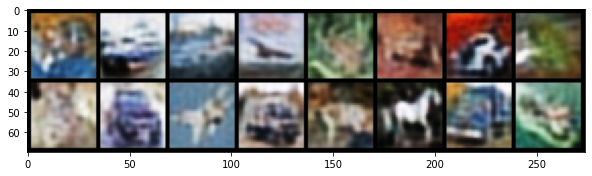

In [15]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)

print("Reconstructed image from convolutional layer and fully connected layers")
decoded_imgs = autoencoderConvF(images)[1]
imshow(torchvision.utils.make_grid(decoded_imgs.data))

GroundTruth:    cat  ship  ship plane  frog


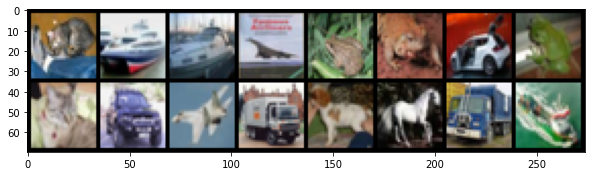

Reconstructed image from only convolutional layer


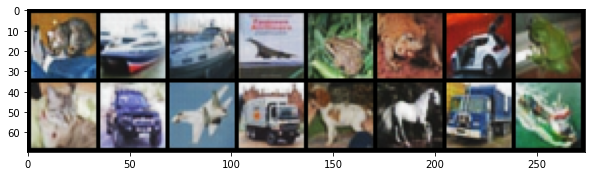

In [16]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)

print("Reconstructed image from only convolutional layer")
decoded_imgs = autoencoderConv(images)[1]
imshow(torchvision.utils.make_grid(decoded_imgs.data))

GroundTruth:    cat  ship  ship plane  frog


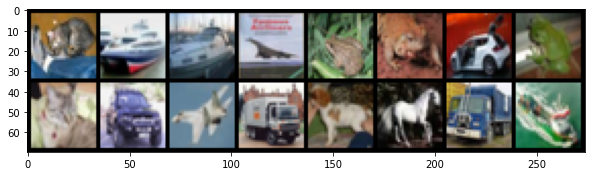

Reconstructed image from fully connected layers only


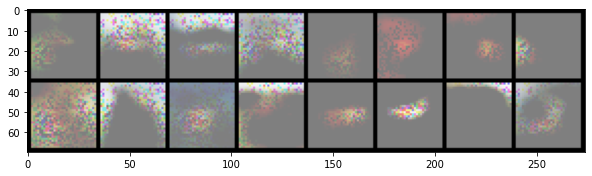

In [17]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)

print("Reconstructed image from fully connected layers only")
decoded_imgs = autoencoderLinear(images)[1]
imshow(torchvision.utils.make_grid(decoded_imgs.data))

#### 2.1 What are the Applications of Autoencoders and different types of Autoencoders

**Application of autoencoders are as follows:**

* Dimensionality Reduction
* Image Compression
* Sequence to sequence prediction
* Image Denoising
* Feature Extraction

**Different types of Autoencoders**
* Convolutional Autoencoders
* Sparse Autoencoders
* Denoising Autoencoders
* Deep Autoencoders

####2.2 PCA versus Autoencoders. Give detailed differences between them. (can use equations in latex and figures for the justification).

The differences are as follows:
* The PCA is linear transformation whereas Autoencoders can be linear as well as non linear based on the activation function.
* There may be correlation among features in Autoencoders, but not in PCA as projection are orthogonal.
* PCA is faster than Autoencoders. PCA can be treated as single layer nueral network with linear activation function.
* Autoencoders can be overfit as nueral network can easily go into problem of overfitting.